In [ ]:
d1 = {'key': 'value', 'key1': 'value1'}

In [3]:
d1['key']

'value'

In [4]:
d1.key

AttributeError: 'dict' object has no attribute 'key'

In [6]:
from box import ConfigBox

d2 = ConfigBox(d1)

In [9]:
d2.key2

BoxKeyError: "'ConfigBox' object has no attribute 'key2'"

In [10]:
def getProduct(a:int ,b:int) -> int:
    return a*b

In [12]:
getProduct(2,'5342')

'53425342'

In [19]:
from ensure import ensure_annotations

@ensure_annotations
def getProduct(a:float ,b:int) -> float:
    return a*b

In [20]:
getProduct(3.0,9)

27.0

# Download data from gdrive

In [7]:
import gdown

url = 'https://drive.google.com/file/d/1n8q3JyWlv5uBwZMVqOIUiqe2X-pv1bMw/view?usp=sharing'



In [8]:
file_id = url.split('/')[5]
file_id

'1n8q3JyWlv5uBwZMVqOIUiqe2X-pv1bMw'

In [ ]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, 'Dataset')

In [1]:
from sklearn.datasets import fetch_california_housing, load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
california = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target column (house value)
df["MedHouseValue"] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [28]:
#dividing it into dependent and independent features
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(mse.mean()*100)

-51.926520114336746


In [45]:
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5757877060324511
0.555891598695244


In [48]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.15, 0.14, 0.05]}
ridge_regressor = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.15


In [49]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.15}
-0.5192648312785371


In [50]:
#lasso regr
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.15, 0.14, 0.05]}
lasso_regressor = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)


C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.880e+03, tolerance: 1.755e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e+03, tolerance: 1.763e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.0001


In [51]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.5192609828610345


Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [59]:
brest_cancer_data = load_breast_cancer()

In [61]:
brest_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [68]:
df = pd.DataFrame(brest_cancer_data.data, columns=brest_cancer_data.feature_names)
df['Target'] = brest_cancer_data.target

In [69]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [70]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [71]:
y.value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [75]:
params =[{'C':[1,3, 5, 7, 10, 12, 15, 20, 100]}, {'max_iter':[100,150, 500, 1000, 1500, 2000]}]

In [76]:
LogisticModel = LogisticRegression(C=100, max_iter=100)

In [78]:
model = GridSearchCV(LogisticModel, param_grid=params, scoring = 'f1', cv=5)
model.fit(x_train, y_train)

C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

,estimator,LogisticRegression(C=100)
,param_grid,"[{'C': [1, 3, ...]}, {'max_iter': [100, 150, ...]}]"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [79]:
print(model.best_params_)
print(model.best_score_)

{'max_iter': 1000}
0.9746818082071538


In [80]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9574468085106383
0.9747899159663865
0.9586776859504132
0.9666666666666667


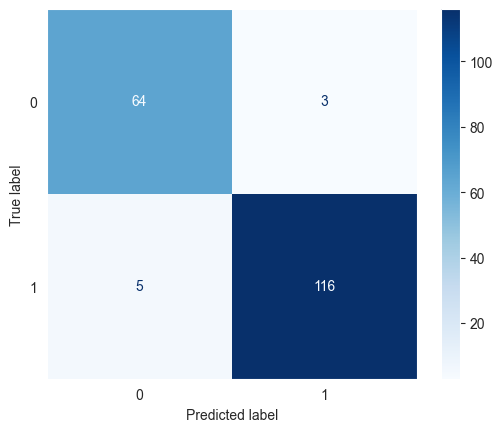

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.97      0.96      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



In [2]:
 import pandas as pd
 import matplotlib.pyplot as plt
 %matplotlib inline

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data = load_iris()
classifier = DecisionTreeClassifier()

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
classifier.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3181818181818182, 0.9166666666666666, 'x[3] <= 0.7\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2727272727272727, 0.8333333333333333, 'True  '),
 Text(0.4090909090909091, 0.75, 'x[3] <= 1.55\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.36363636363636365, 0.8333333333333333, '  False'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

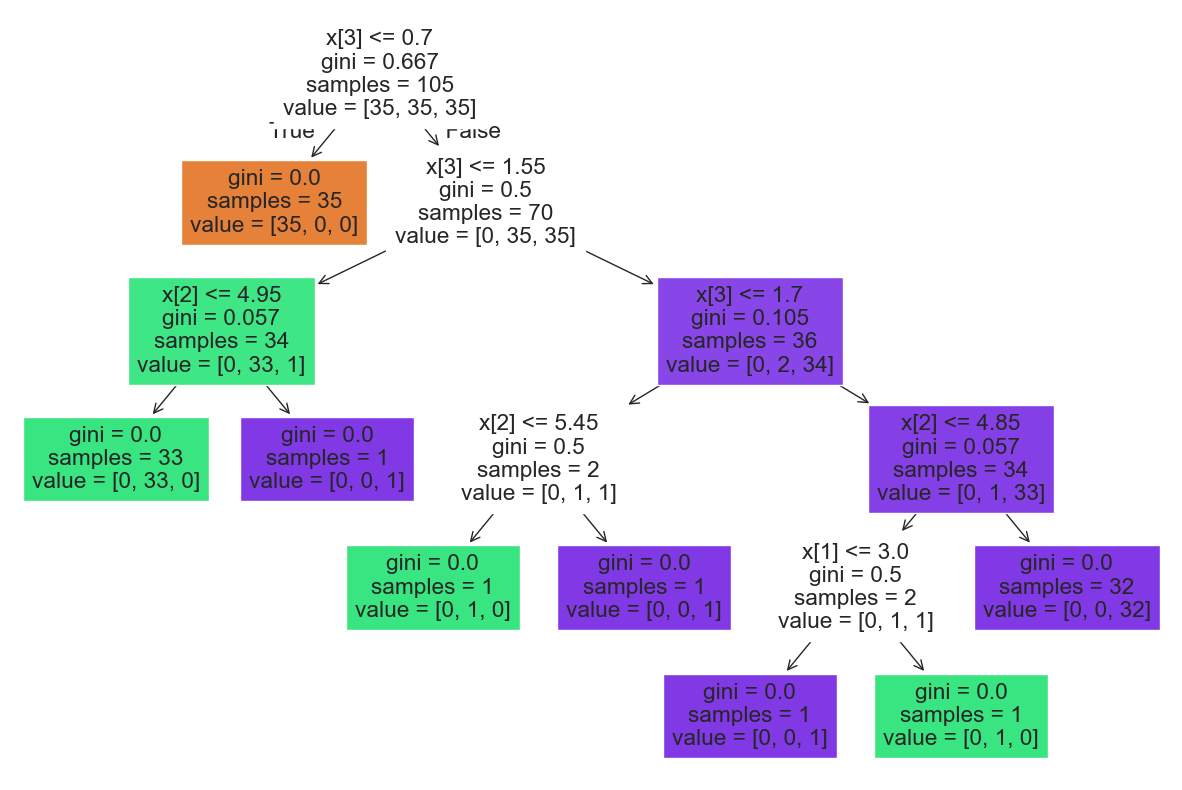

In [14]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled=True)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       1])

In [18]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [20]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [21]:
{'a':1, 'b':2, 'c':3} == {'b':2, 'c':3, 'a':1}

True

In [1]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    source_url: str
    local_data_file: Path
    unzip_dir: Path

In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

C:\Users\manud\anaconda3\envs\cancer\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



TF version: 2.15.0
GPU available: []
